In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Loading the Adidas sales dataset
df = pd.read_csv('Adidas US Sales Datasets.csv')

# Looking at the data
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

Dataset shape: (9648, 13)

First 5 rows:
      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   01-01-2020  Northeast  New York  New York   
1  Foot Locker      1185732   02-01-2020  Northeast  New York  New York   
2  Foot Locker      1185732   03-01-2020  Northeast  New York  New York   
3  Foot Locker      1185732   04-01-2020  Northeast  New York  New York   
4  Foot Locker      1185732   05-01-2020  Northeast  New York  New York   

                     Product Price per Unit Units Sold Total Sales  \
0      Men's Street Footwear        $50.00       1,200  $6,00,000    
1    Men's Athletic Footwear        $50.00       1,000  $5,00,000    
2    Women's Street Footwear        $40.00       1,000  $4,00,000    
3  Women's Athletic Footwear        $45.00         850  $3,82,500    
4              Men's Apparel        $60.00         900  $5,40,000    

  Operating Profit Operating Margin Sales Method  
0       $3,00,000               50% 

In [6]:
# Exploring my Adidas data structure to identify issues

# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Looking at the problematic columns that should be numeric
print("\n" + "="*50)
print("CHECKING DATA ISSUES")
print("="*50)

# These columns should be numbers but are showing as 'object'
print("Sample values from columns that should be numeric:")
print(f"Price per Unit: {df['Price per Unit'].head(3).tolist()}")
print(f"Units Sold: {df['Units Sold'].head(3).tolist()}")
print(f"Total Sales: {df['Total Sales'].head(3).tolist()}")
print(f"Operating Profit: {df['Operating Profit'].head(3).tolist()}")
print(f"Operating Margin: {df['Operating Margin'].head(3).tolist()}")

# Checking for categorical columns
print("\n" + "="*50)
print("CATEGORICAL COLUMNS")
print("="*50)

print(f"Retailers: {df['Retailer'].unique()}")
print(f"Regions: {df['Region'].unique()}")
print(f"Products: {df['Product'].unique()}")
print(f"Sales Methods: {df['Sales Method'].unique()}")

# Checking the date column
print(f"\nDate range: {df['Invoice Date'].min()} to {df['Invoice Date'].max()}")
print(f"Date format sample: {df['Invoice Date'].head(3).tolist()}")

Missing values in each column:
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

CHECKING DATA ISSUES
Sample values from columns that should be numeric:
Price per Unit: ['$50.00 ', '$50.00 ', '$40.00 ']
Units Sold: ['1,200', '1,000', '1,000']
Total Sales: ['$6,00,000 ', '$5,00,000 ', '$4,00,000 ']
Operating Profit: ['$3,00,000 ', '$1,50,000 ', '$1,40,000 ']
Operating Margin: ['50%', '30%', '35%']

CATEGORICAL COLUMNS
Retailers: ['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']
Regions: ['Northeast' 'South' 'West' 'Midwest' 'Southeast']
Products: ["Men's Street Footwear" "Men's Athletic Footwear"
 "Women's Street Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Women's Apparel"]
Sales Methods: ['In-store' 'Outlet

In [14]:
# Cleaning the data :fixing formats and data types and creating a copy to work with

df_clean = df.copy()

# 1. Converting Invoice Date to datetime format
df_clean['Invoice Date'] = pd.to_datetime(df_clean['Invoice Date'], format='%d-%m-%Y')

# 2. Cleaning Price per Unit - removing $ and spaces, converting to float
df_clean['Price per Unit'] = df_clean['Price per Unit'].str.replace('$', '').str.replace(' ', '').astype(float)

# 3. Cleaning Units Sold - removing commas, converting to integer
df_clean['Units Sold'] = df_clean['Units Sold'].str.replace(',', '').astype(int)

# 4. Cleaning Total Sales - removing $ and commas, converting to float
df_clean['Total Sales'] = df_clean['Total Sales'].str.replace('$', '').str.replace(',', '').str.replace(' ', '').astype(float)

# 5. Cleaning Operating Profit - removing $ and commas, converting to float
df_clean['Operating Profit'] = df_clean['Operating Profit'].str.replace('$', '').str.replace(',', '').str.replace(' ', '').astype(float)

# 6. Converting Operating Margin from percentage to decimal
df_clean['Operating Margin'] = df_clean['Operating Margin'].str.replace('%', '').astype(float) / 100

print("Data cleaning completed successfully.")

print("\nCleaned data preview:")
print(df_clean.head())

print("\nNew data types:")
print(df_clean.dtypes)

Data cleaning completed successfully.

Cleaned data preview:
      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Metho

In [16]:
# Basic Analysis - Getting key insights

# Proper statistical analysis
print("="*60)
print("ADIDAS US SALES ANALYSIS - KEY METRICS")
print("="*60)

# Overall business metrics
total_revenue = df_clean['Total Sales'].sum()
total_profit = df_clean['Operating Profit'].sum()
total_units = df_clean['Units Sold'].sum()
avg_price = df_clean['Price per Unit'].mean()

print(f"Total Revenue: ${total_revenue:,.0f}")
print(f"Total Profit: ${total_profit:,.0f}")
print(f"Total Units Sold: {total_units:,}")
print(f"Average Price per Unit: ${avg_price:.2f}")
print(f"Overall Profit Margin: {(total_profit/total_revenue)*100:.1f}%")

print("\n" + "="*60)
print("TOP PERFORMERS")
print("="*60)

# Top performing retailers by sales
print("Top Retailers by Revenue:")
retailer_sales = df_clean.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
print(retailer_sales)

print("\nTop Regions by Revenue:")
region_sales = df_clean.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
print(region_sales)

print("\nTop Products by Revenue:")
product_sales = df_clean.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
print(product_sales)

ADIDAS US SALES ANALYSIS - KEY METRICS
Total Revenue: $899,902,125
Total Profit: $332,135,122
Total Units Sold: 2,478,861
Average Price per Unit: $45.22
Overall Profit Margin: 36.9%

TOP PERFORMERS
Top Retailers by Revenue:
Retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Kohl's           102114753.0
Amazon            77698912.0
Walmart           74558410.0
Name: Total Sales, dtype: float64

Top Regions by Revenue:
Region
West         269943182.0
Northeast    186324067.0
Southeast    163171236.0
South        144663181.0
Midwest      135800459.0
Name: Total Sales, dtype: float64

Top Products by Revenue:
Product
Men's Street Footwear        208826244.0
Women's Apparel              179038860.0
Men's Athletic Footwear      153673680.0
Women's Street Footwear      128002813.0
Men's Apparel                123728632.0
Women's Athletic Footwear    106631896.0
Name: Total Sales, dtype: float64


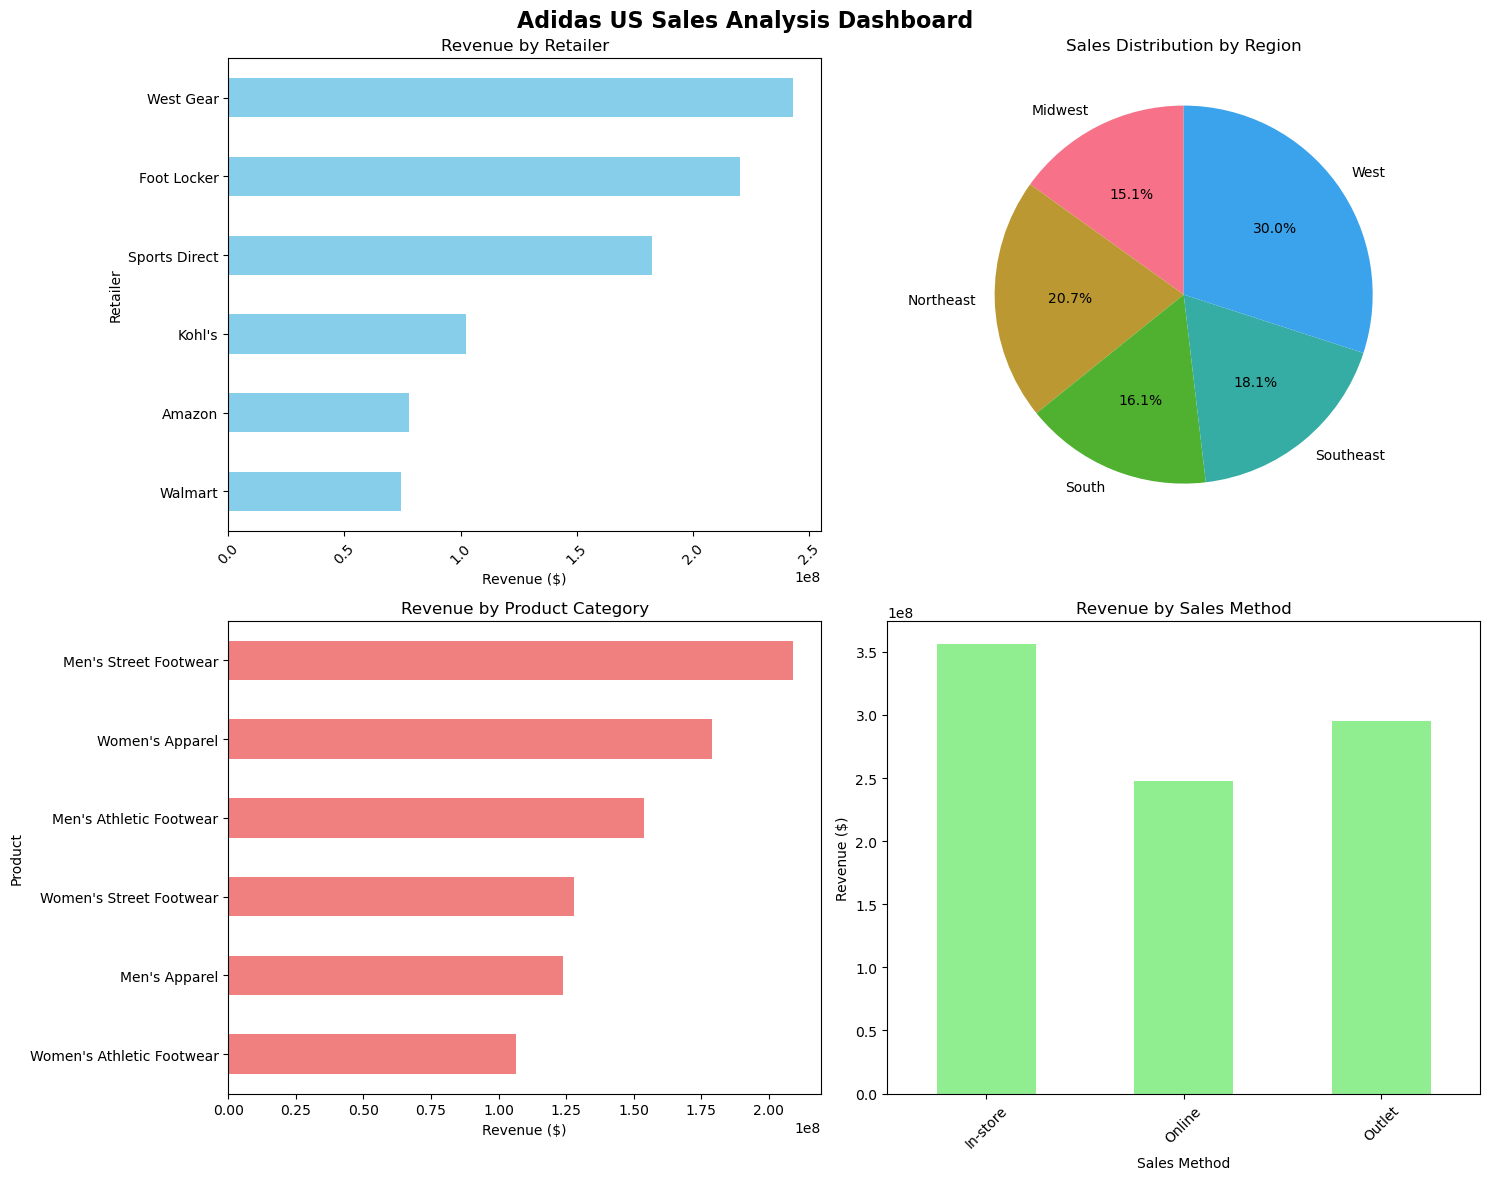

Dashboard created! This shows the key patterns in your Adidas sales data.


In [18]:
# Creating visualizations to understand the data better

import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting style
plt.style.use('default')
sns.set_palette("husl")
fig_size = (12, 8)

# Creating subplots for multiple charts
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Adidas US Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Top Retailers by Revenue (Bar Chart)
retailer_sales = df_clean.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=True)
retailer_sales.plot(kind='barh', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Revenue by Retailer')
axes[0,0].set_xlabel('Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Regional Sales Distribution (Pie Chart)
region_sales = df_clean.groupby('Region')['Total Sales'].sum()
axes[0,1].pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Sales Distribution by Region')

# 3. Product Performance (Bar Chart)
product_sales = df_clean.groupby('Product')['Total Sales'].sum().sort_values(ascending=True)
product_sales.plot(kind='barh', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Revenue by Product Category')
axes[1,0].set_xlabel('Revenue ($)')

# 4. Sales Method Comparison (Bar Chart)
method_sales = df_clean.groupby('Sales Method')['Total Sales'].sum()
method_sales.plot(kind='bar', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Revenue by Sales Method')
axes[1,1].set_xlabel('Sales Method')
axes[1,1].set_ylabel('Revenue ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Dashboard created! This shows the key patterns in your Adidas sales data.")